<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
<font face="IranNastaliq" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی برق
</font>
<br>
<font color=green>
یادگیری ماشین
</font>
<br>
ترم اول سال تحصیلی 1400-1401
</div>
<hr/>
<font color=red size=6>
<p></p>

<div align=center>:جلسه سوم 
<br>
 شبکه های یادگیری عمیق</div>
</font>
<hr>
</font></div>


<style type="text/css" scoped>
p{
border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
};
</style>


# Pytorch

In [1]:
# Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import copy
import os

%matplotlib inline

pytorch آموزش

In [2]:
x = torch.tensor([1, 5 ,10])
x

tensor([ 1,  5, 10])

In [3]:
x = torch.ones(size=(3,5), device="cuda", dtype=torch.float)
print(x)
print(x.requires_grad)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], device='cuda:0')
False


In [4]:
y = torch.randn(size=(3,5), device="cpu", requires_grad=True)
print(y.device)
print(y)

cpu
tensor([[ 0.8158,  0.7401, -1.5024, -0.5477, -0.6187],
        [ 0.2837,  0.1974,  0.7019, -0.1313, -1.8421],
        [ 0.0058, -0.5078,  1.6912,  1.4823, -0.1934]], requires_grad=True)


In [5]:
w = x+y

RuntimeError: ignored

In [6]:
# device
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print ('Your system: ' + str(device))

Your system: cuda


In [7]:
z = y.to(device=device)
w = x+z
# w = torch.add(a,b)
print(z.requires_grad)
print(w.requires_grad)

True
True


In [8]:
print(x.shape)
d = x.view(size=(15,))
e = y.view(size=(15,1))
print(d.shape)
print(e.shape)

torch.Size([3, 5])
torch.Size([15])
torch.Size([15, 1])


In [9]:
print(x[0,0])
print(x[0,0].item())
#a = x[0,0].item()

tensor(1., device='cuda:0')
1.0


In [10]:
x = torch.ones(size=(3,5), device="cpu", dtype=torch.float)

In [11]:
d = x.numpy()

In [12]:
x.add_(1)
print(d)

[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


In [13]:
e = x.clone().numpy()

In [15]:
x.add_(1)
print(e)

[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


In [16]:
x = torch.ones(size=(3,5), device="cuda", dtype=torch.float, requires_grad=True)
# d = x.numpy()

In [17]:
e = np.array([1, 2, 5])
s = torch.from_numpy(e.copy())
s

tensor([1, 2, 5])

In [18]:
print(x.requires_grad)
print(x.grad)

True
None


In [19]:
y = x+2

In [20]:
y.grad

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [21]:
y.retain_grad

<function Tensor.retain_grad>

In [22]:
y.grad_fn

In [23]:
z = y.mean()
print(z.grad_fn)

In [24]:
print(type(z))
w = z.detach()
print(type(w))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [25]:
print(w.grad_fn)

None


torch.cat( )
<br>
....

Neural net

![picture](https://drive.google.com/uc?id=1_UKcZiN3wCMwa0iMeJCkyYJMdAee0nBR)

![picture](https://drive.google.com/uc?id=1ek6T0C6_VLo1QeX2wgK98_H8stuhkWPY)

![picture](https://drive.google.com/uc?id=1s-3-nmK-1Uhk7l3lNZc3iC_XPfmbUXkP)

In [26]:
# Hyperparams
batch_size_train = 64
batch_size_test = 100
lr = 0.001
num_epoch = 20


In [27]:
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip

--2021-12-23 10:04:36--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master [following]
--2021-12-23 10:04:36--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [         <=>        ] 761.30M  27.4MB/s    in 35s     

2021-12-23 10:05:12 (21.8 MB/s) - ‘master.zip’ saved [798281939]



In [28]:
%%capture
!unzip master.zip

images-size: torch.Size([128, 3, 100, 100])
out-size: torch.Size([3, 1634, 818])


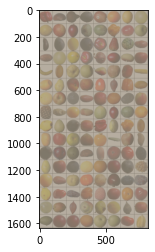

In [29]:
batch_size = 128
learning_rate = 1e-3

transform_train = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root='/content/Fruit-Images-Dataset-master/Training', transform=transform_train)
test_dataset = datasets.ImageFolder(root='/content/Fruit-Images-Dataset-master/Test', transform=transform_train)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

def imshow(inp, title=None):
    
    inp = inp.cpu()
    inp = inp.numpy().transpose((1, 2, 0))
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    
images, labels = next(iter(train_dataloader)) 
print("images-size:", images.shape)

out = torchvision.utils.make_grid(images)
print("out-size:", out.shape)

imshow(out)

![picture](https://drive.google.com/uc?id=16I-PNO-HK6rBC55OtpeCacD9yOyMBuaG)

In [48]:
net = models.resnet18(pretrained=True)
net = net.cuda()
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 131)
net.fc = net.fc.to(device)

In [51]:
n_epochs = 5
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(train_dataloader)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    net.train()
    for batch_idx, (data_, target_) in enumerate(train_dataloader):
        data_, target_ = data_.to(device), target_.to(device)
        optimizer.zero_grad()
        
        outputs = net(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net.eval()
        for data_t, target_t in (test_dataloader):
            data_t, target_t = data_t.to(device), target_t.to(device)
            outputs_t = net(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t/total_t)
        val_loss.append(batch_loss/len(test_dataloader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')

        
        #if network_learned:
        #    valid_loss_min = batch_loss
        #    torch.save(net.state_dict(), 'resnet.pt')
        #    print('Improvement-Detected, save-model')
    #net.train()

Epoch 1

Epoch [1/5], Step [0/529], Loss: 3.2000
Epoch [1/5], Step [20/529], Loss: 3.1615
Epoch [1/5], Step [40/529], Loss: 3.1989
Epoch [1/5], Step [60/529], Loss: 3.0619
Epoch [1/5], Step [80/529], Loss: 3.0025
Epoch [1/5], Step [100/529], Loss: 3.0428
Epoch [1/5], Step [120/529], Loss: 2.9148
Epoch [1/5], Step [140/529], Loss: 2.8208
Epoch [1/5], Step [160/529], Loss: 2.9206
Epoch [1/5], Step [180/529], Loss: 2.7529
Epoch [1/5], Step [200/529], Loss: 2.7091
Epoch [1/5], Step [220/529], Loss: 2.7382
Epoch [1/5], Step [240/529], Loss: 2.6498
Epoch [1/5], Step [260/529], Loss: 2.7887
Epoch [1/5], Step [280/529], Loss: 2.6497
Epoch [1/5], Step [300/529], Loss: 2.5759
Epoch [1/5], Step [320/529], Loss: 2.4883
Epoch [1/5], Step [340/529], Loss: 2.4217
Epoch [1/5], Step [360/529], Loss: 2.4456
Epoch [1/5], Step [380/529], Loss: 2.4275
Epoch [1/5], Step [400/529], Loss: 2.4216
Epoch [1/5], Step [420/529], Loss: 2.4575
Epoch [1/5], Step [440/529], Loss: 2.4174
Epoch [1/5], Step [460/529], Lo

TypeError: ignored

**مدل دوم**

In [ ]:
# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * targets.size(0)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    train_loss = train_loss / total
    correct = correct / total * 100
    print(f'train_loss: {train_loss:.4f} , train_acc: {correct:.4f}')
    return train_loss, correct

def test(epoch):
    global acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item() * targets.size(0)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    test_loss = test_loss / total
    acc = 100 * correct / total
    print(f'test_loss: {test_loss:.4f} , test_acc: {acc:.4f}')
    return test_loss, acc


In [ ]:
track = {'train_loss':[], 'train_acc':[], 'test_loss':[], 'test_acc':[]}
for epoch in range(0,40):
    train_loss, train_acc = train(epoch)
    test_loss, test_acc = test(epoch)

    track['train_loss'].append(train_loss)
    track['train_acc'].append(train_acc)
    track['test_loss'].append(test_loss)
    track['test_acc'].append(test_acc)

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.title("Train-Validation Accuracy")
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')

In [32]:
# Dataloading

# ------------------------------------------- CIFAR10 ------------------------------------------- #
meanI = torch.tensor([0.4914, 0.4822, 0.4465])
stdI = torch.tensor([0.2023, 0.1994, 0.2010])

transform_train = transforms.Compose([
    transforms.Resize((40, 40)),
    transforms.RandomCrop((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean = meanI, std = stdI),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = meanI, std = stdI),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=False, num_workers=2)


# ------------------------------------------- CIFAR100 ------------------------------------------- #
meanI = torch.tensor([0.5071, 0.4867, 0.4408]) 
stdI = torch.tensor([0.2675, 0.2565, 0.2761])

transform_train = transforms.Compose([
    transforms.Resize((40, 40)),
    transforms.RandomCrop((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean = meanI, std = stdI),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = meanI, std = stdI),
])

trainsetC100 = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
testsetC100 = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)

Index = np.random.choice(100, 5)

trainsetC5 = []
for im, la in trainsetC100:
  if la in Index:
    trainsetC5.append([im,np.where(Index==la)[0][0]])

testsetC5 = []
for im, la in testsetC100:
  if la in Index:
    testsetC5.append([im,np.where(Index==la)[0][0]])

del trainsetC100
del testsetC100

trainloaderC5 = torch.utils.data.DataLoader(trainsetC5, batch_size=batch_size_train, shuffle=True, num_workers=2)
testloaderC5 = torch.utils.data.DataLoader(testsetC5, batch_size=batch_size_test, shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


In [33]:
# Build the CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
            

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        ### view 等同 reshape. 差別在於pytorch中reshape是複製, 而view則是永遠指向源頭
        # "Unlike reshape, reshape always copies memory. view never copies memory."
        #ref: z = torch.zeros(3, 2)
        #>>>  x = z.view(2, 3)
        #>>>  z.fill_(1)
        #>>>  x
        #    tensor([[1., 1., 1.],
        #            [1., 1., 1.]]) 
        
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#display net architecture
print(Net())

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
# cd to where you put resnet.py
%cd /content/drive/MyDrive/MLS_HW3/
#./jdvfjdj

In [ ]:
from resnet import *

Model Saving & Loading

In [ ]:
save_path = F'/content/drive/MyDrive/MLS_HW3/models'
os.makedirs(save_path, exist_ok=True)
path = os.path.join(save_path, 'P1_OriginalModel'+'.pth')
state = {'model':net.state_dict(), 'track':track}
torch.save(state, path)

In [ ]:
print('==> Loading model..')
net = ResNet18()
net = net.to(device)
if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

state = torch.load('/content/drive/MyDrive/MLS_HW3/models/P1_OriginalModel.pth')
track = state['track']
net.load_state_dict(state['model'])

نگاه کردن خروجی برای یک ورودی خاص

In [34]:
imgloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)
dataiter = iter(imgloader)
org_images, org_labels = dataiter.next()

In [35]:
net.eval()
org_labels = org_labels.to(device)
org_images = org_images.to(device)
outputs= net(org_images)
_, predicted = torch.max(outputs.data, 1)

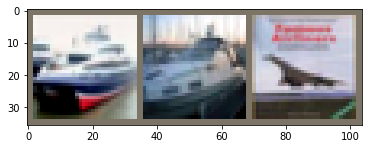

In [41]:
selected = np.array([1,2,3])
samples = []
samples_labels = []
samples_pred = []
for i in selected:
  samples.append(org_images[i])
  samples_labels.append(org_labels[i])
  samples_pred.append(outputs[i])
samples = torch.stack(samples)
samples_labels = torch.stack(samples_labels)
samples_pred = torch.stack(samples_pred)
imshow(torchvision.utils.make_grid(samples.cpu()))

Transfer learning

In [43]:
net4 = Net()
net4

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
if torch.cuda.is_available():
    net4 = net4.cuda()

# net4 = net4.to(device)

net_dict = net.state_dict()
net4_dict = net4.state_dict()

net_dict = {k: v for k, v in net_dict.items() if not (k in ['fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])}
# 2. overwrite entries in the existing state dict
net4_dict.update(net_dict) 
# 3. load the new state dict
net4.load_state_dict(net4_dict) # load without ref


# freeze
for name, param in net4.named_parameters():
  if not (name in ['fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias']):
    param.requires_grad = False